# **credit card fraud detection**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\VISHAKHA\AppData\Local\Temp\ipykernel_28628\2095697874.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('d:\laptopData.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [11]:
df.shape

(1303, 12)

In [12]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


# **Data cleaning**

In [14]:
df.isna().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [17]:
df.drop(['Cpu'], axis=1, inplace=True)

In [18]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [ ]:
df['Gpu'] = df['OpSys'] + df['Weight']

In [1]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df[["Memory"]]

,Memory
0,128GB SSD
1,128GB Flash Storage
2,256GB SSD
3,512GB SSD
4,256GB SSD
...,...
1298,128GB SSD
1299,512GB SSD
1300,64GB Flash Storage
1301,1TB HDD


In [24]:
df.drop(['Ram','Memory'], axis=1, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Gpu               1273 non-null   object 
 6   OpSys             1273 non-null   object 
 7   Weight            1273 non-null   object 
 8   Price             1273 non-null   float64
 9   Gpu	              1273 non-null   object 
dtypes: float64(2), object(8)
memory usage: 101.9+ KB


In [26]:
df.select_dtypes(include='number').describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [29]:
df['Gpu'].mode()

0    Intel HD Graphics 620
Name: Gpu, dtype: object

In [30]:
df['Gpu'].replace("Intel Iris Plus Graphics 640","Intel HD Graphics 6000", inplace=True)

In [31]:
df['Gpu'].mode()

0    Intel HD Graphics 620
Name: Gpu, dtype: object

In [32]:
df.describe()

,Unnamed: 0,Price
count,1273.000000,1273.000000
mean,652.674784,59955.814073
std,376.493027,37332.251005
min,0.000000,9270.720000
25%,327.000000,31914.720000
50%,652.000000,52161.120000
75%,980.000000,79333.387200
max,1302.000000,324954.720000


In [41]:
df['Company'].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [34]:
df.replace(to_replace = '0.488306', value = '1.268803', inplace = True)

In [35]:
df['Gpu'].isna().sum()

30

# **Data Visualisation**
## *univariate Analysis*
### 1. Gpu

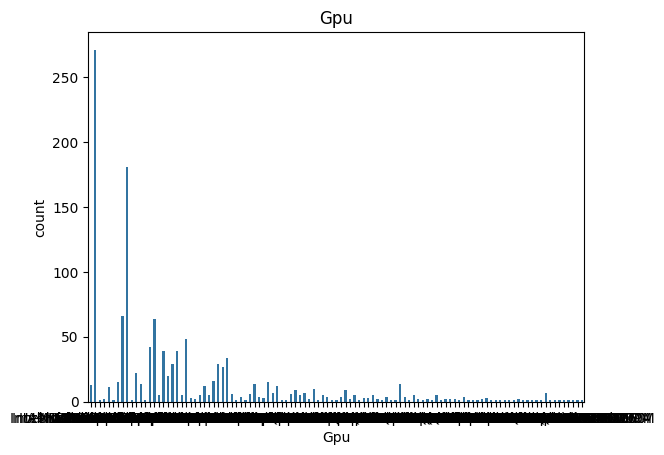

In [36]:
sns.countplot(x = 'Gpu', data = df, width = 0.5)
plt.title("Gpu")
plt.show()

# **OpSys Distribution**

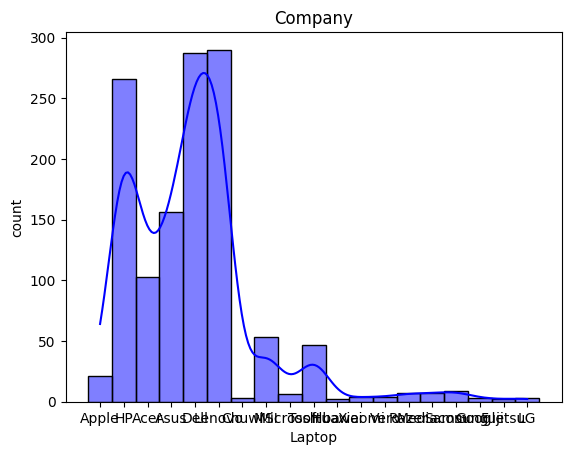

In [43]:
sns.histplot(df['Company'], bins = 50, kde = True, color = 'b')
plt.title('Company')
plt.xlabel('Laptop')
plt.ylabel('count')
plt.show()

### 3.Laptop Price Distribution 

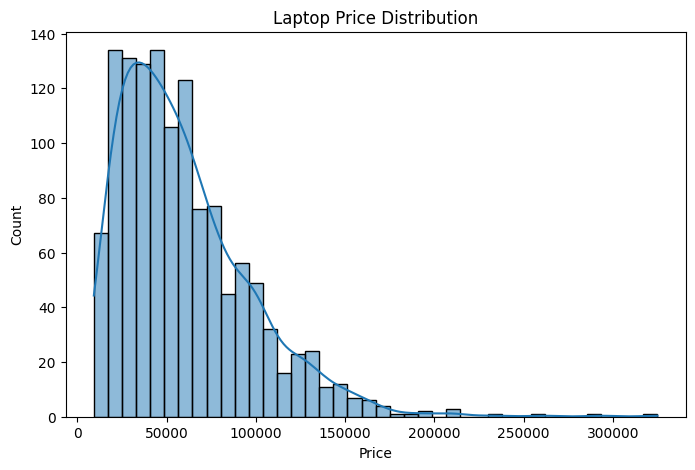

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title("Laptop Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

sns.histplot(df['Ram'], bins = 10, kde = True, color = 'b')
plt.title('Ram used per Day')
plt.xlabel('Sleep Hours')
plt.ylabel('count')
plt.show()

### Ram used per day


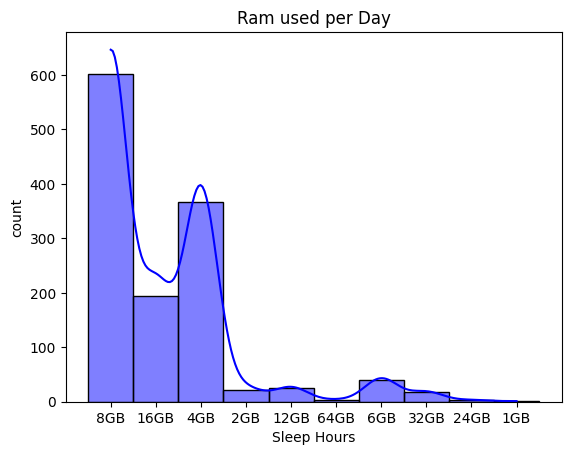

In [6]:
sns.histplot(df['Ram'], bins = 10, kde = True, color = 'b')
plt.title('Ram used per Day')
plt.xlabel('Sleep Hours')
plt.ylabel('count')
plt.show()

### company vs average price

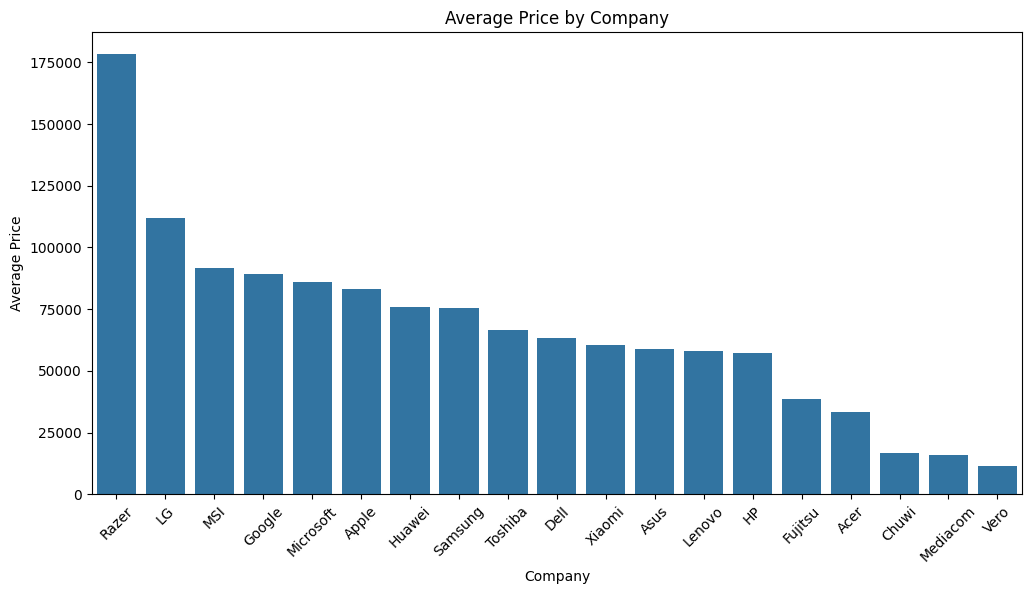

In [45]:
plt.figure(figsize=(12,6))
avg_price_company = df.groupby("Company")["Price"].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_company.index, y=avg_price_company.values)
plt.xticks(rotation=45)
plt.title("Average Price by Company")
plt.ylabel("Average Price")
plt.show()

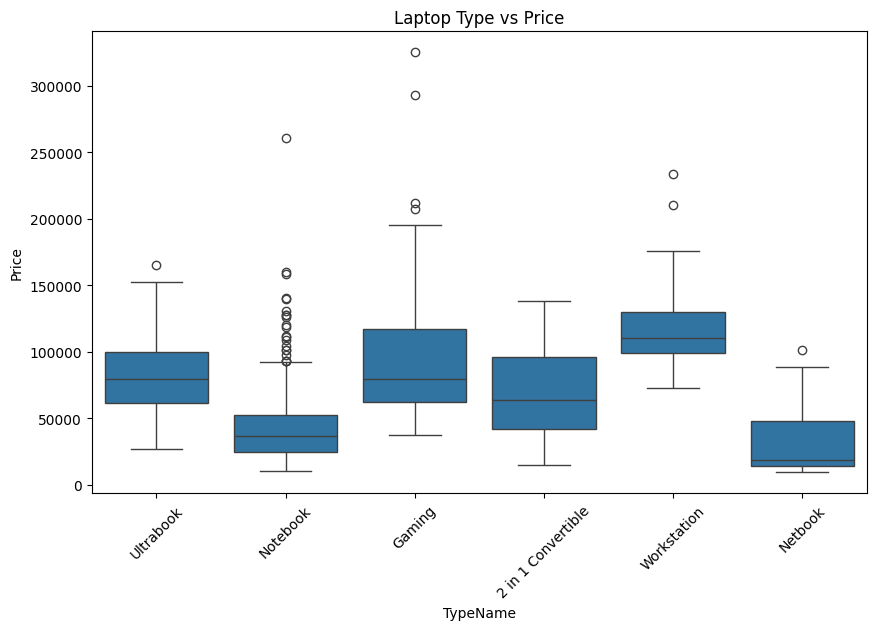

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x="TypeName", y="Price", data=df)
plt.xticks(rotation=45)
plt.title("Laptop Type vs Price")
plt.show()

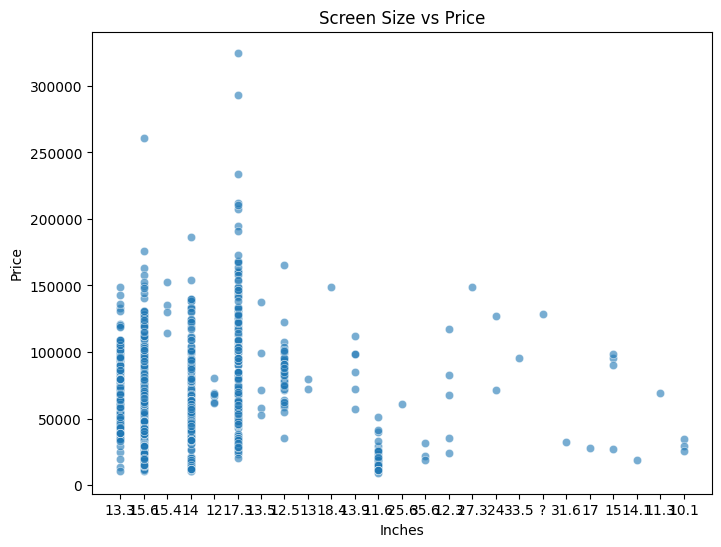

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Inches", y="Price", data=df, alpha=0.6)
plt.title("Screen Size vs Price")
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x="Ram", y="Price", data=df, estimator=lambda x: sum(x)/len(x))
plt.title("RAM vs Average Price")
plt.show()


ValueError: Could not interpret value `Ram` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

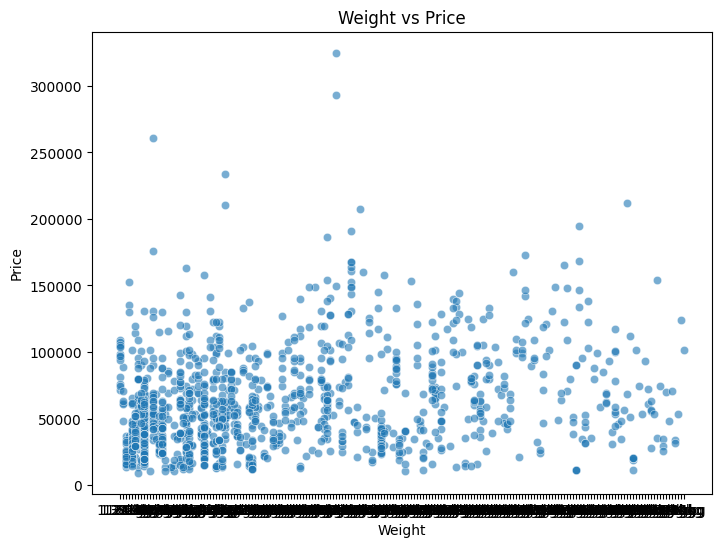

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Weight", y="Price", data=df, alpha=0.6)
plt.title("Weight vs Price")
plt.show()

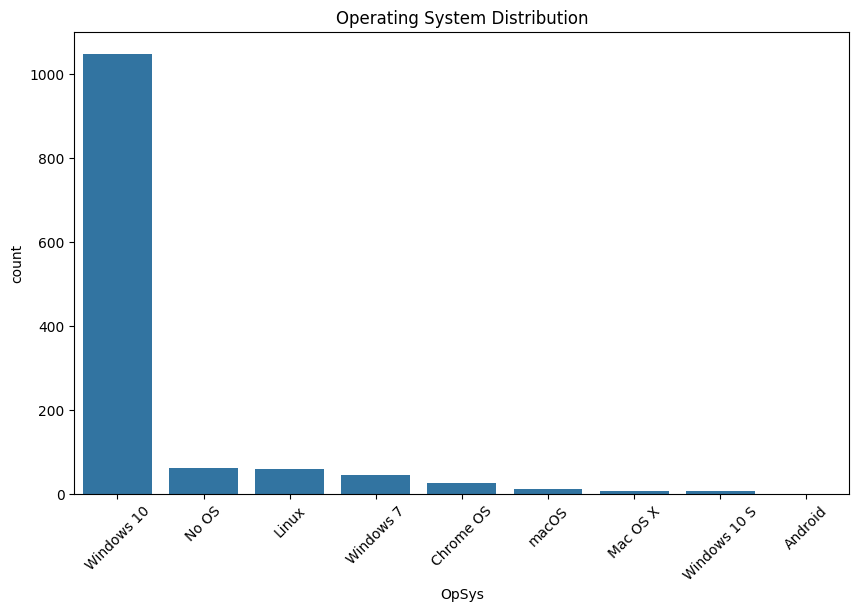

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(x="OpSys", data=df, order=df['OpSys'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Operating System Distribution")
plt.show()

In [4]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


###  Make a copy

In [6]:
df_categorical = df.copy()

### Convert all non-numeric (object type) columns to categorical codes

In [7]:
for col in df_categorical.select_dtypes(include=['object']).columns:
    df_categorical[col] = df_categorical[col].astype('category').cat.codes

### save the transformed dataset

In [8]:
df_categorical.to_csv("categorical_dataset.csv", index=False)

In [9]:
df_categorical

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,1,4,7,23,65,9,4,58,8,39,71378.6832
1,1.0,1,4,7,1,63,9,2,51,8,36,47895.5232
2,2.0,7,3,14,8,74,9,16,53,4,75,30636.0000
3,3.0,1,4,13,25,85,1,29,9,8,72,135195.3360
4,4.0,1,4,7,23,67,9,16,59,8,39,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,10,0,10,13,89,6,4,47,5,79,33992.6400
1299,1299.0,10,0,7,19,89,1,29,47,5,42,79866.7200
1300,1300.0,10,3,10,0,34,4,35,40,5,57,12201.1200
1301,1301.0,7,3,14,0,89,8,10,21,5,106,40705.9200


###  Machine Learning Model Training

In [27]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error


### Convert all object (string) columns to categorical codes

In [28]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

### Handle missing values (fill NaN with column median)

In [29]:
df_encoded = df_encoded.fillna(df_encoded.median(numeric_only=True))

### Features (X) and Target (y)

In [30]:
X = df_encoded.drop(columns=["Price"])
y = df_encoded["Price"]


### Train-test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models to compare

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}: R² Score = {r2:.4f}, MAE = {mae:.2f}")


Linear Regression: R² Score = 0.3433, MAE = 20795.42
Random Forest: R² Score = 0.8154, MAE = 9660.21
Decision Tree: R² Score = 0.7299, MAE = 12197.57


### Random Forest gave the best results, Decision Tree overfit, and Linear Regression was weakest.